In [1]:
import os
import numpy as np
import matplotlib as plt
import pandas as pd

In [2]:
# Read the data
data_path = '../Lab 5/'
train_data_df = pd.read_csv(os.path.join(data_path, 'train_data.csv'))

In [3]:
train_data_df

,language,text,label
0,dansk,"\nDette er et fremragende initiativ, og jeg st...",Ireland
1,dansk,"\nHr. formand, jeg er sikker på, at alle her e...",Ireland
2,dansk,"\nHr. formand, folk på den nordlige halvkugle ...",England
3,dansk,"\nHr. formand, med forbehold af nogle få ændri...",England
4,dansk,"\n\n - Hr. formand, jeg må protestere mod de...",England
...,...,...,...
41565,Nederlands,"\nMijnheer de Voorzitter, juridisch gezien is ...",England
41566,Nederlands,"\n\n . Mijnheer de Voorzitter, het is niet ...",Scotland
41567,Nederlands,"\nAls afgevaardigde van Ierland, het 'voedsele...",Ireland
41568,Nederlands,"\nMijnheer de Voorzitter, het is niet onterech...",England


In [4]:
# Codificarea etichetelor

etichete_unice = train_data_df['label'].unique()
print(etichete_unice)
label2id = {}
id2label = {}

for idx, eticheta in enumerate(etichete_unice):
    label2id[eticheta] = idx
    id2label[idx] = eticheta

print(label2id)
print(id2label)


['Ireland' 'England' 'Scotland']
{'Ireland': 0, 'England': 1, 'Scotland': 2}
{0: 'Ireland', 1: 'England', 2: 'Scotland'}


In [5]:
labels = []

for i in train_data_df['label']:
    labels.append(label2id[i])

labels[:10]

[0, 0, 1, 1, 1, 0, 1, 1, 1, 2]

## Preprocesarea Datelor

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from simplemma import lemmatize
from simplemma import lang_detector

nltk.download('stopwords')

In [7]:
stop_words = set(stopwords.words('italian'))

def procesare_text(text):

    # Eliminarea numerelor
    text = re.sub(r'\d+', '', text)
    
    # Tokenizare si selectarea cuvintelor
    cuvinte = re.findall(r'\w+', text)

    # Eliminarea cuvintelor de legatura
    cuvinte = [cuvant for cuvant in cuvinte if cuvant not in stop_words]

    # Lemmatizarea cuvintelor in diferite limbi
    cuvinte = [lemmatize(cuvant, lang='it') for cuvant in cuvinte]

    # print(lang_detector(text, lang=('da', 'it', 'es', 'fr', 'de')))

    return cuvinte

In [8]:
exemplu_italian = train_data_df[train_data_df['language'] == 'italiano']
text_italian = exemplu_italian['text'].iloc[0]
italian = procesare_text(text_italian)
print(len(italian))
print(italian)

111
['si', 'trattare', 'eccellente', 'iniziativa', 'condividere', 'totalmente', 'obiettivo', 'mettere', 'rilievo', 'valore', 'educativo', 'sport', 'costruire', 'partenariato', 'organizzazione', 'sportivo', 'istituto', 'scolastico', 'potere', 'dare', 'molto', 'frutto', 'in', 'qualità', 'deputare', 'irlandese', 'particolarmente', 'lieto', 'proporre', 'designare', 'anno', 'europeo', 'educazione', 'tramite', 'sport', 'andare', 'coincidere', 'presidenza', 'irlandese', 'unione', 'prima', 'metà', 'potere', 'rassicurare', 'collega', 'Irlanda', 'svolgere', 'ruolo', 'grande', 'prominenza', 'molto', 'azione', 'previsto', 'L', 'Irlanda', 'lungo', 'tradizione', 'sportivo', 'particolare', 'amatoriale', 'volontaristico', 'come', 'notare', 'corso', 'svolgere', 'importante', 'manifestazione', 'sportivo', 'campionare', 'mondiale', 'calciare', 'gioco', 'olimpico', 'paraolimpici', 'Atene', 'il', 'proporre', 'prevedere', 'anno', 'preparatorio', 'avvenire', 'alcuno', 'attività', 'corrispondenza', 'anno', 'a

In [9]:
print(lemmatize('organiseringen', lang=('da', 'de')))
# >>> organisering

print(lemmatize('organiseringen', lang=('de', 'da')))
# >>> organiseringen

organisering
organiseringen


In [10]:
data = []
for text in exemplu_italian['text']:
    data.append(procesare_text(text))

print(data[1])

['signore', 'presidente', 'presente', 'sapere', 'certamente', 'verde', 'condividere', 'operare', 'unione', 'europeo', 'materia', 'accordo', 'pesca', 'non', 'contrario', 'principio', 'accordo', 'pesca', 'avanzare', 'forte', 'riserva', 'modalità', 'base', 'negoziazione', 'quando', 'occupare', 'relazione', 'Madagascar', 'fare', 'studio', 'dettagliare', 'accordare', 'pesca', 'tale', 'paese', 'trovare', 'gravemente', 'carente', 'da', 'allora', 'votare', 'tale', 'accordo', 'L', 'accordare', 'Maurizio', 'isola', 'vicino', 'Madagascar', 'molto', 'simile', 'accordare', 'quest', 'ultimare', 'paese', 'L', 'accordare', 'Senegal', 'presentare', 'invece', 'altro', 'problema', 'si', 'trattare', 'proroga', 'quattro', 'anno', 'prima', 'volta', 'esso', 'concedere', 'nave', 'UE', 'accesso', 'risorsa', 'pelagiche', 'tale', 'risorsa', 'costituire', 'obiettivo', 'essenziale', 'grande', 'importante', 'settore', 'pesca', 'artigianale', 'pescatore', 'molto', 'preoccupato', 'impattare', 'accordare', 'sostentame

## Antrenare, validare, testare

In [11]:
from sklearn.model_selection import train_test_split
labels = labels[24942:33256]

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


## Bag of Words

In [12]:
from collections import Counter

In [13]:
vocab = Counter()

for cuvinte in data:
    vocab.update(cuvinte)

print(vocab.most_common(30))


[('il', 14323), ('dovere', 13701), ('essere', 12198), ('europeo', 11965), ('potere', 11313), ('stato', 10906), ('fare', 8333), ('presidente', 8310), ('unione', 7412), ('Commissione', 6840), ('relazione', 6403), ('volere', 6379), ('molto', 6226), ('parlamento', 6076), ('altro', 5907), ('paese', 5778), ('signore', 5684), ('tale', 5180), ('membro', 4852), ('onorevole', 4558), ('avere', 4291), ('diritto', 4257), ('parte', 4189), ('anno', 4092), ('modo', 3939), ('consiglio', 3938), ('questione', 3938), ('politica', 3897), ('venire', 3699), ('alcuno', 3673)]


### Reprezentarea datelor sub forma vectoriala

In [14]:
N = 50
cuvinte_caracteristice = []
for cuvant, frecventa in vocab.most_common(N):
    if cuvant.strip():
        cuvinte_caracteristice.append(cuvant)

print(cuvinte_caracteristice)

['il', 'dovere', 'essere', 'europeo', 'potere', 'stato', 'fare', 'presidente', 'unione', 'Commissione', 'relazione', 'volere', 'molto', 'parlamento', 'altro', 'paese', 'signore', 'tale', 'membro', 'onorevole', 'avere', 'diritto', 'parte', 'anno', 'modo', 'consiglio', 'questione', 'politica', 'venire', 'alcuno', 'in', 'e', 'problema', 'commissariare', 'proporre', 'lavoro', 'trattare', 'nuovo', 'proprio', 'non', 'riguardare', 'Europa', 'gruppo', 'importante', 'solo', 'L', 'd', 'commissione', 'governo', 'chiedere']


In [15]:
word2id = {}
id2word = {}
for idx, cuv in enumerate(cuvinte_caracteristice):
    word2id[cuv] = idx
    id2word[idx] = cuv

print(word2id)
print(id2word)

{'il': 0, 'dovere': 1, 'essere': 2, 'europeo': 3, 'potere': 4, 'stato': 5, 'fare': 6, 'presidente': 7, 'unione': 8, 'Commissione': 9, 'relazione': 10, 'volere': 11, 'molto': 12, 'parlamento': 13, 'altro': 14, 'paese': 15, 'signore': 16, 'tale': 17, 'membro': 18, 'onorevole': 19, 'avere': 20, 'diritto': 21, 'parte': 22, 'anno': 23, 'modo': 24, 'consiglio': 25, 'questione': 26, 'politica': 27, 'venire': 28, 'alcuno': 29, 'in': 30, 'e': 31, 'problema': 32, 'commissariare': 33, 'proporre': 34, 'lavoro': 35, 'trattare': 36, 'nuovo': 37, 'proprio': 38, 'non': 39, 'riguardare': 40, 'Europa': 41, 'gruppo': 42, 'importante': 43, 'solo': 44, 'L': 45, 'd': 46, 'commissione': 47, 'governo': 48, 'chiedere': 49}
{0: 'il', 1: 'dovere', 2: 'essere', 3: 'europeo', 4: 'potere', 5: 'stato', 6: 'fare', 7: 'presidente', 8: 'unione', 9: 'Commissione', 10: 'relazione', 11: 'volere', 12: 'molto', 13: 'parlamento', 14: 'altro', 15: 'paese', 16: 'signore', 17: 'tale', 18: 'membro', 19: 'onorevole', 20: 'avere',

In [16]:
ctr = Counter(data[6])

features = np.zeros(len(cuvinte_caracteristice))

for idx in range(len(features)):
    cuvant = id2word[idx]
    features[idx] = ctr[cuvant]

print(features)

[2. 2. 0. 5. 0. 2. 1. 0. 4. 0. 1. 0. 0. 1. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


## Rezolvare

In [17]:
def count_most_common(how_many, data):

    counter = Counter()
    for cuvinte in data:
        counter.update(cuvinte)

    cuvinte_caracteristice = []
    for cuvant, frecventa in counter.most_common(how_many):
        if cuvant.strip():
            cuvinte_caracteristice.append(cuvant)

    return cuvinte_caracteristice

In [18]:
def build_id_word_dicts(cuvinte_caracteristice):

    word2id = {}
    id2word = {}
    for idx, cuv in enumerate(cuvinte_caracteristice):
        word2id[cuv] = idx
        id2word[idx] = cuv

    return word2id, id2word

In [19]:
def featurize(data, id2word):

    ctr = Counter(data)
    features = np.zeros(len(id2word))

    for idx in range(len(features)):
        cuvant = id2word[idx]
        features[idx] = ctr[cuvant]

    return features

In [20]:
def features_multi(data, id2word):

    features = []
    for text in data:
        features.append(featurize(text, id2word))

    return np.array(features)

In [21]:
cuvinte_caracteristice = count_most_common(50, data)
print(cuvinte_caracteristice)

['il', 'dovere', 'essere', 'europeo', 'potere', 'stato', 'fare', 'presidente', 'unione', 'Commissione', 'relazione', 'volere', 'molto', 'parlamento', 'altro', 'paese', 'signore', 'tale', 'membro', 'onorevole', 'avere', 'diritto', 'parte', 'anno', 'modo', 'consiglio', 'questione', 'politica', 'venire', 'alcuno', 'in', 'e', 'problema', 'commissariare', 'proporre', 'lavoro', 'trattare', 'nuovo', 'proprio', 'non', 'riguardare', 'Europa', 'gruppo', 'importante', 'solo', 'L', 'd', 'commissione', 'governo', 'chiedere']


In [22]:
cuvinte_caracteristice = count_most_common(60, data)

word2id, id2word = build_id_word_dicts(cuvinte_caracteristice)

X_train = features_multi(X_train, id2word)
X_test = features_multi(X_test, id2word)

print(X_train.shape)
print(X_test.shape)

(6651, 60)
(1663, 60)


In [23]:
from sklearn import svm
from sklearn.metrics import accuracy_score

model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.5496091401082381


0.5640408899579074
[[ 57 369  11]
 [ 29 862  23]
 [  4 289  19]]


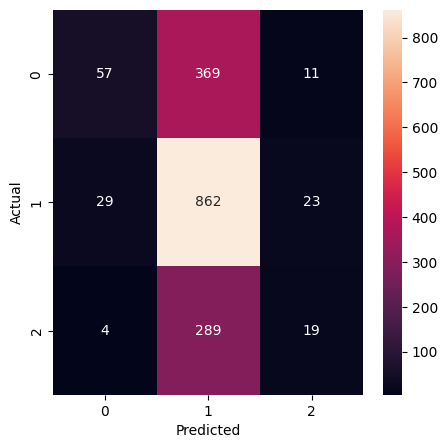

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
